# Выпускной проект по телекоммуникациям

# Прогнозирование оттока клиентов у оператора связи "ТелеДом".

# Описание задачи:

Заказчик хочет начать бороться c оттоком клиентов и для этого он вводит промокоды и специальные условия всем, кто планирует отказаться от услуг. "ТелеДом" собрал персональные данные о клиентах, их тарифах и услугах и предоставил их нам для разработки модели, которая будет предсказывать, `разорвет ли абонент договор`. Наша задача - `обучить на этих данных модель, которая будет предсказывать отток клиентов`.

# Что предоставил заказчик:

- ***Описание услуг***

    1. Оператор предоставляет два основных типа услуг: 
    
    - Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
    - Интернет. Подключение может быть двух типов: через телефонную линию (`DSL, от англ. digital subscriber line — «цифровая абонентская линия»`) или оптоволоконный кабель (`Fiber optic`).
    
    2. Также доступны такие услуги:
    
    - Интернет-безопасность: антивирус (`DeviceProtection`) и блокировка небезопасных сайтов (`OnlineSecurity`);
    - Выделенная линия технической поддержки (`TechSupport`);
    - Облачное хранилище файлов для резервного копирования данных (`OnlineBackup`);
    - Стриминговое телевидение (`StreamingTV`) и каталог фильмов (`StreamingMovies`).
    
  Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.
  
  
- ***Описание данных***

    ***Данные состоят из нескольких файлов, полученных из разных источников:***
    
     - `contract_new.csv` — информация о договоре;
     - `personal_new.csv` — персональные данные клиента;
     - `internet_new.csv` — информация об интернет-услугах;
     - `phone_new.csv` — информация об услугах телефонии.
        
   **Файл contract_new.csv**

         - `customerID` — идентификатор абонента;
         - `BeginDate` — дата начала действия договора;
         - `EndDate` — дата окончания действия договора;
         - `Type` — тип оплаты: раз в год-два или ежемесячно;
         - `PaperlessBilling` — электронный расчётный лист;
         - `PaymentMethod` — тип платежа;
         - `MonthlyCharges` — расходы за месяц;
         - `TotalCharges` — общие расходы абонента.
   
   **Файл personal_new.csv**

        - `customerID` — идентификатор пользователя;
        - `gender` — пол;
        - `SeniorCitizen` — является ли абонент пенсионером;
        - `Partner` — есть ли у абонента супруг или супруга;
        - `Dependents` — есть ли у абонента дети.

   **Файл internet_new.csv**

        - `customerID` — идентификатор пользователя;
        - `InternetService` — тип подключения;
        - `OnlineSecurity` — блокировка опасных сайтов;
        - `OnlineBackup` — облачное хранилище файлов для резервного копирования данных;
        - `DeviceProtection` — антивирус;
        - `TechSupport` — выделенная линия технической поддержки;
        - `StreamingTV` — стриминговое телевидение;
        - `StreamingMovies` — каталог фильмов.
   
   **Файл phone_new.csv**

        - `customerID` — идентификатор пользователя;
        - `MultipleLines` — подключение телефона к нескольким линиям одновременно.


Во всех файлах столбец `customerID` содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

# План работы

**Шаг 1. Загрузка данных.**

    Загрузить данные и выполнить их первичный осмотр.

**Шаг 2. Исследовательский анализ и предобработка данных.**

    Выполнить исследовательский анализ каждого датафрейма и при необходимости выполните предобработку. Сделать выводы об имеющихся признаках: понадобятся ли они для обучения моделей.

**Шаг 3. Объединение данных.**

    Объединить выбранные признаки в один датафрейм по ключу.

**Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма.**

    Выполнить исследовательский анализ объединённого датафрейма, визуализировать распределения признаков и при необходимости выполните предобработку. Проведите корреляционный анализ. Можно использовать не только имеющиеся признаки, но и генерировать новые.

**Шаг 5. Подготовка данных.**

    Выполнить подготовку данных для обучения модели. Разделить данные на две выборки, при масштабировании и кодировании учитывать особенности данных и моделей.

**Шаг 6. Обучение моделей машинного обучения.**

    Обучить как минимум две модели. Хотя бы для одной из них подберать как минимум два гиперпараметра.

**Шаг 7. Выбор лучшей модели.**

    Выберать лучшую модель и проверить её качество на тестовой выборке.

**Шаг 8. Общий вывод и рекомендации заказчику.**

    Сделать общий вывод о проделанной работе: описать основные этапы работы, полученные результаты и дать рекомендации для бизнеса.

In [1]:
!pip install optuna

     |████████████████████████████████| 386 kB 2.3 MB/s eta 0:00:01


In [2]:
!pip install -U scikit-learn

     |████████████████████████████████| 13.5 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 62.8 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


## Шаг 1. Загрузка даных.

In [3]:
import os
import numpy as np
import pandas as pd
from typing import List, Tuple, Any, Dict
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score,\
                            accuracy_score,\
                            confusion_matrix,\
                            RocCurveDisplay,\
                            ConfusionMatrixDisplay,\
                            classification_report
from catboost import CatBoostClassifier
import optuna
import scipy.stats as stats
import sklearn

In [4]:
print(sklearn.__version__)

1.6.1


In [5]:
PATH1 = '/datasets/contract_new.csv'
PATH2 = '/datasets/personal_new.csv'
PATH3 = '/datasets/internet_new.csv'
PATH4 = '/datasets/phone_new.csv'
RANDOM_STATE = 210425

In [6]:
try:
    df_contract = pd.read_csv(PATH1)
    df_personal = pd.read_csv(PATH2)
    df_internet = pd.read_csv(PATH3)
    df_phone = pd.read_csv(PATH4)
except:
    df_contract = pd.read_csv('/contract_new.csv')
    df_personal = pd.read_csv('/personal_new.csv')
    df_internet = pd.read_csv('/internet_new.csv')
    df_phone = pd.read_csv('/cphone_new.csv')

In [7]:
data_all: dict[str, pd.DataFrame] = {
    'df_contract': df_contract,
    'df_personal': df_personal,
    'df_internet': df_internet,
    'df_phone': df_phone
}

In [8]:
def analysis_df(named_dfs):
    for name, df in named_dfs.items():
        print(f"{'-'*80}\n\nДатасет: {name}")
        
        print('All info')
        print('Первые 5 строк датасета')
        print(df.head(), end="\n\n")
        print('Общая информация')
        print(df.info(), end="\n\n")
        
        print(80 * '-', end="\n\n")
        print()
        print('Кол-во пропусков')
        print(df.isna().sum(), end="\n\n")
        
        print(80 * '-', end="\n\n")
        print()
        print('Statistic info')
        print(df.describe(), end="\n\n")
        
        print(80 * '-', end="\n\n")
        print()
        print('Кол-во дубликатов')
        print(df.duplicated().sum())

In [9]:
analysis_df(data_all)

--------------------------------------------------------------------------------

Датасет: df_contract
All info
Первые 5 строк датасета
   customerID   BeginDate EndDate            Type PaperlessBilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01      No        One year               No   
4  9237-HQITU  2019-09-01      No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  
0           Electronic check           29.85        31.04  
1               Mailed check           56.95      2071.84  
2               Mailed check           53.85       226.17  
3  Bank transfer (automatic)           42.30       1960.6  
4           Electronic check           70.70        353.5  

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0

### Анализ информации из датасета

**1. Датасет df_contract:**

    - Датасет имеет 8 столбцов.
    - Не содержит пропусков и неявных дубликатов.
    - Необходимо привести столбец BeginDate и EndDate к формату datetime&
    - TotalCharges необходимо привести к типу float64.
    - Метод describe показал нормальное распределение в данных.

**2. Датасет df_personal:**

    - Датасет содержит 5 столбцов.
    - Один столбец формата int - является ли пользователь пенсионером.
    - Явные дубликаты и прпоуски отсутствуют.
    - Метод describe показывает нормальное распределение в данных.

**3. Датасет df_internet:**

    - Датасет содержит 8 столбцов.
    - Отсутствуют неявные дубликаты и пропуски в данных.
    
**4. Датасет df_phone:**

    - Датасет содержит 2 колонки.
    - Отсутствуют пропуски и неявные дубликаты.

## Шаг 2. Исследовательский анализ и предобработка данных

### Подготовка df_contract

In [10]:
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'], errors='coerce')
df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'], errors='coerce')

In [11]:
snapshot = pd.to_datetime('2020-02-01')
df_contract['TenureDays'] = (
    df_contract['EndDate'].fillna(snapshot) - df_contract['BeginDate']
).dt.days

In [12]:
print(df_contract['PaperlessBilling'].isna().sum())

0


In [13]:
df_contract['PaperlessBilling'] = (
    df_contract['PaperlessBilling'].map({'No': 0, 'Yes': 1}).astype(int))

# Категории с Unknown
for col in ['Type', 'PaymentMethod']:
    df_contract[col] = (df_contract[col].astype('category')
                                        .cat.add_categories('Unknown')
                                        .fillna('Unknown'))

### Подготовка df_personal

In [15]:
df_personal['gender'] = df_personal['gender'].map({'Female': 0, 'Male': 1})
df_personal['Partner'] = df_personal['Partner'].map({'No': 0, 'Yes': 1})
df_personal['Dependents'] = df_personal['Dependents'].map({'No': 0, 'Yes': 1})

### Подготовка df_phone

In [16]:
def make_three_level(df, col):
    df[col] = (df[col].map({'Yes':'Yes', 'No':'No'})
                      .astype('category')
                      .cat.add_categories('NotUsed')
                      .fillna('NotUsed'))

In [17]:
for col in ['OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies']:
    make_three_level(df_internet, col)

make_three_level(df_phone, 'MultipleLines')

### Подготовка df_internet

In [18]:
df_internet['InternetService'] = (df_internet['InternetService'].astype('category')
                                                                .cat.add_categories('NotUsed')
                                                                .fillna('NotUsed'))

## Шаг 3. Объединение данных

In [19]:
df = df_contract.merge(df_personal, on='customerID', how='left') \
                .merge(df_internet, on='customerID', how='left') \
                .merge(df_phone, on='customerID', how='left')

In [20]:
service_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies','MultipleLines']
df['ServiceCount'] = df[service_cols].apply(lambda row: (row=='Yes').sum(), axis=1)

In [21]:
mask_missing = df_contract['TotalCharges'].astype(str).str.strip() == ''
implicit_missing = df_contract[mask_missing]

print(f"Найдено неявных пропусков TotalCharges: {len(implicit_missing)}")

Найдено неявных пропусков TotalCharges: 11


In [22]:
print(implicit_missing[['customerID', 'BeginDate', 'EndDate', 'MonthlyCharges', 'TotalCharges']])

      customerID  BeginDate EndDate  MonthlyCharges TotalCharges
488   4472-LVYGI 2020-02-01     NaT           52.55             
753   3115-CZMZD 2020-02-01     NaT           20.25             
936   5709-LVOEQ 2020-02-01     NaT           80.85             
1082  4367-NUYAO 2020-02-01     NaT           25.75             
1340  1371-DWPAZ 2020-02-01     NaT           56.05             
3331  7644-OMVMY 2020-02-01     NaT           19.85             
3826  3213-VVOLG 2020-02-01     NaT           25.35             
4380  2520-SGTTA 2020-02-01     NaT           20.00             
5218  2923-ARZLG 2020-02-01     NaT           19.70             
6670  4075-WKNIU 2020-02-01     NaT           73.35             
6754  2775-SEFEE 2020-02-01     NaT           61.90             


Все 11 записей с `пустыми` **TotalCharges** оказались абонентами, которые присоединились ровно в день `среза` — `1 февраля 2020` (*BeginDate = 2020-02-01*), у которых ещё не было ни одного полного месячного расчёта. Отсюда и пустая строка вместо числа:

- TenureDays = 0 для всех 11 клиентов

- EndDate = NaT (они активны)

- Ещё не было времени накопить любые расходы, поэтому счёт попросту не сформирован.

***Вывод:*** эти пропуски не являются `ошибками ввода`, а естественным результатом того, что контракт начался в день последней даты учёта. Заполняем `TotalCharges = 0` для этих 11 абонентов, так как они пока `ничего не потратили`.

In [23]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges']   = pd.to_numeric(df['TotalCharges'],   errors='coerce')

In [24]:
df['TotalCharges'].fillna(0, inplace=True)

In [25]:
df['TenureMonths'] = (df['TenureDays'] / 30).round().astype(int).clip(lower=1)
df['ChargeDelta']  = df['MonthlyCharges'] * df['TenureMonths'] - df['TotalCharges']

In [26]:
print(df[['TenureDays','TenureMonths','MonthlyCharges','TotalCharges','ChargeDelta']].head(10))
print(df[['MonthlyCharges','TotalCharges','ChargeDelta']].dtypes)

   TenureDays  TenureMonths  MonthlyCharges  TotalCharges  ChargeDelta
0          31             1           29.85         31.04        -1.19
1        1036            35           56.95       2071.84       -78.59
2         123             4           53.85        226.17       -10.77
3        1371            46           42.30       1960.60       -14.80
4         153             5           70.70        353.50         0.00
5         337            11           99.65       1150.96       -54.81
6         671            22           89.10       2058.21       -98.01
7         306            10           29.75        300.48        -2.98
8         945            32          104.80       3573.68      -220.08
9         882            29           56.15       1628.35         0.00
MonthlyCharges    float64
TotalCharges      float64
ChargeDelta       float64
dtype: object


In [27]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1101 non-null   datetime64[ns]
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   int64         
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   TenureDays        7043 non-null   int64         
 9   gender            7043 non-null   int64         
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   int64         
 12  Dependents        7043 non-null   int64         
 13  InternetService   5517 non-null   category      
 14  OnlineSecurity    5517 n

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TenureDays,gender,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,ServiceCount,TenureMonths,ChargeDelta
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,31.04,31,0,...,No,Yes,No,No,No,No,NaN,1,1,-1.19
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,2071.84,1036,1,...,Yes,No,Yes,No,No,No,No,2,35,-78.59
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,1,Mailed check,53.85,226.17,123,1,...,Yes,Yes,No,No,No,No,No,2,4,-10.77
3,7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1960.60,1371,1,...,Yes,No,Yes,Yes,No,No,NaN,3,46,-14.80
4,9237-HQITU,2019-09-01,NaT,Month-to-month,1,Electronic check,70.70,353.50,153,0,...,No,No,No,No,No,No,No,0,5,0.00


In [29]:
service_cols = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

for col in service_cols:
    if 'NotUsed' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories('NotUsed')
    df[col] = df[col].fillna('NotUsed')

In [30]:
for col in service_cols:
    print(f"Столбец: {col}")
    print(f"Категории: {df[col].cat.categories}")
    print(f"Пропуски: {df[col].isna().sum()}")
    print("-" * 50)

Столбец: InternetService
Категории: Index(['DSL', 'Fiber optic', 'NotUsed'], dtype='object')
Пропуски: 0
--------------------------------------------------
Столбец: OnlineSecurity
Категории: Index(['No', 'Yes', 'NotUsed'], dtype='object')
Пропуски: 0
--------------------------------------------------
Столбец: OnlineBackup
Категории: Index(['No', 'Yes', 'NotUsed'], dtype='object')
Пропуски: 0
--------------------------------------------------
Столбец: DeviceProtection
Категории: Index(['No', 'Yes', 'NotUsed'], dtype='object')
Пропуски: 0
--------------------------------------------------
Столбец: TechSupport
Категории: Index(['No', 'Yes', 'NotUsed'], dtype='object')
Пропуски: 0
--------------------------------------------------
Столбец: StreamingTV
Категории: Index(['No', 'Yes', 'NotUsed'], dtype='object')
Пропуски: 0
--------------------------------------------------
Столбец: StreamingMovies
Категории: Index(['No', 'Yes', 'NotUsed'], dtype='object')
Пропуски: 0
------------------------

In [34]:
df['Churn'] = df['EndDate'].notna().astype(int)

In [35]:
print("Клиенты с уходом (EndDate заполнен):", df['EndDate'].notna().sum())
print("Churn = 1:", df['Churn'].sum())

mismatch = df[(df['EndDate'].notna()) & (df['Churn'] != 1)]
print(f"Ошибок для Churn=1: {len(mismatch)}")

mismatch = df[(df['EndDate'].isna()) & (df['Churn'] != 0)]
print(f"Ошибок для Churn=0: {len(mismatch)}")

Клиенты с уходом (EndDate заполнен): 1101
Churn = 1: 1101
Ошибок для Churn=1: 0
Ошибок для Churn=0: 0


## Шаг 4. Исследовательский анализ

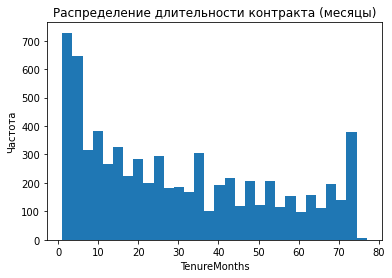

In [36]:
# Посмотрим распределение сроков аренды
plt.figure()
plt.hist(df['TenureMonths'], bins=30)
plt.title('Распределение длительности контракта (месяцы)')
plt.xlabel('TenureMonths')
plt.ylabel('Частота')
plt.show()

**TenureMonths:** большинство клиентов находятся в диапазоне первых `0–10 месяцев`, затем плавно убывает число абонентов вплоть до максимума (`~75 мес.`), с локальным пиком на «длинных» контрактах (`около 72–75 мес.`).

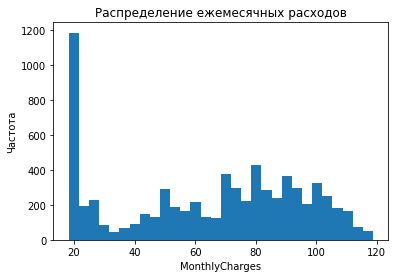

In [37]:
# Распределение ежемесячных платежей
plt.figure()
plt.hist(df['MonthlyCharges'], bins=30)
plt.title('Распределение ежемесячных расходов')
plt.xlabel('MonthlyCharges')
plt.ylabel('Частота')
plt.show()

**MonthlyCharges:** сильная концентрация в диапазоне `20–40 USD`, далее равномерное распределение до `~119 USD` и небольшой хвост.

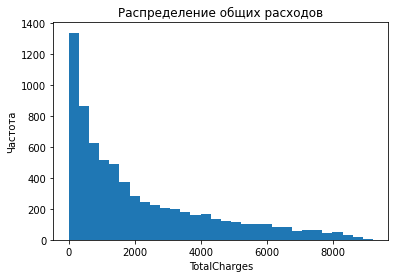

In [38]:
# Распределение общих расходов
plt.figure()
plt.hist(df['TotalCharges'].dropna(), bins=30)
plt.title('Распределение общих расходов')
plt.xlabel('TotalCharges')
plt.ylabel('Частота')
plt.show()

**TotalCharges:** скошенное вправо распределение: много клиентов с общими расходами до `2000 USD`, длинный хвост до `~9000 USD` (долгосрочные абоненты с высокими суммами).

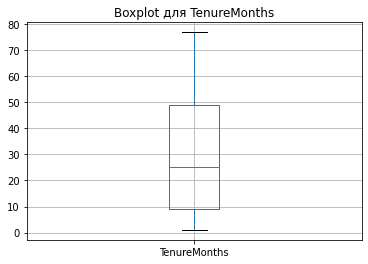

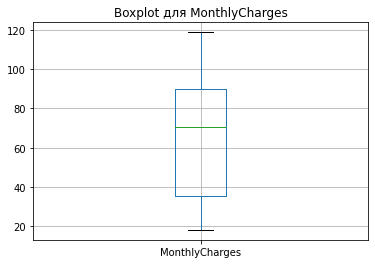

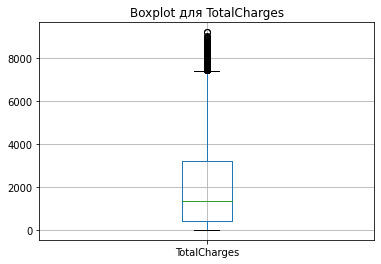

In [39]:
# Посмотрим выбросы
for col in ['TenureMonths', 'MonthlyCharges', 'TotalCharges']:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Boxplot для {col}')
    plt.show()

**Boxplot:**

`TenureMonths`: верхние усы доходят до `~77`, выбросов почти нет, все клиенты в диапазоне `0–77 месяцев`.

`MonthlyCharges`: значения лежат в пределах `~15–120`, без экстремальных выбросов.

`TotalCharges`: заметные выбросы сверху и длинный положительный хвост — абоненты с очень большими общими расходами (`>7000`).

In [40]:
medians = (df.groupby('Churn')[['TenureMonths', 'MonthlyCharges', 'TotalCharges']]
             .median()
             .rename(index={0: 'Retained', 1: 'Churned'}))

print("Медианные значения по статусу оттока:")
print(medians)

Медианные значения по статусу оттока:
          TenureMonths  MonthlyCharges  TotalCharges
Churn                                               
Retained            23            69.2       1192.80
Churned             30            84.2       2139.03


Ушедшие клиенты имеют в среднем более долгий «tenure» (возможно, достигают конца контракта), более высокие месячные платежи и большие суммарные расходы.

In [41]:
num_cols = [
    'TenureDays', 'TenureMonths', 'MonthlyCharges', 'TotalCharges', 'ChargeDelta', 'ServiceCount'
]

In [42]:
binary_cols = [
    'PaperlessBilling', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'
] + service_cols
all_num = num_cols + binary_cols

In [43]:
spearman_corr = df[all_num + ['Churn']].corr(method='spearman')
corr_with_churn = spearman_corr['Churn'].drop('Churn').sort_values(ascending=False)
print("\nК орреляция Спирмена с Churn:")
print(corr_with_churn)


К орреляция Спирмена с Churn:
ServiceCount        0.209418
MonthlyCharges      0.164086
Partner             0.146447
TotalCharges        0.139681
TenureMonths        0.064888
TenureDays          0.061635
SeniorCitizen       0.056724
PaperlessBilling    0.054869
Dependents          0.032564
gender              0.013499
ChargeDelta        -0.020454
Name: Churn, dtype: float64


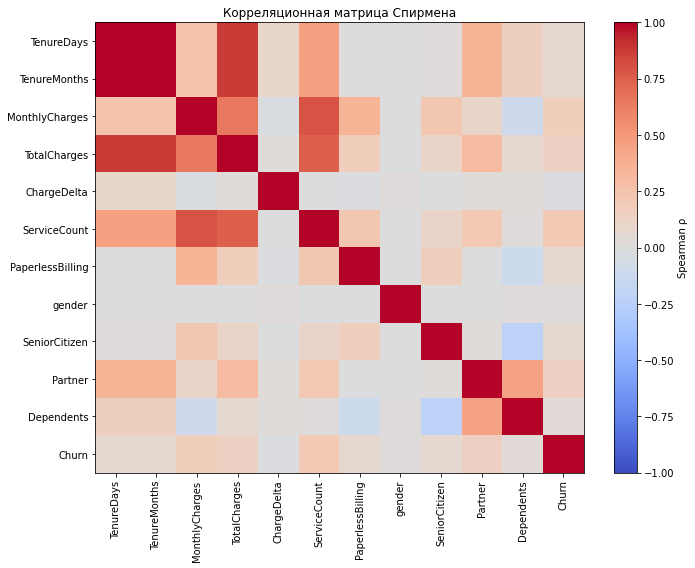

In [44]:
plt.figure(figsize=(10,8))
plt.imshow(spearman_corr, aspect='auto', cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Spearman ρ')
plt.xticks(np.arange(len(spearman_corr)), spearman_corr.columns, rotation=90)
plt.yticks(np.arange(len(spearman_corr)), spearman_corr.index)
plt.title('Корреляционная матрица Спирмена')
plt.tight_layout()
plt.show()

Матрица корреляций показывает, какие из числовых факторов сильнее связаны с оттоком:

- `TenureDays` - отрицательная. Чем дольше клиент с оператором, тем ниже вероятность оттока.

- `MonthlyCharges` - положительная. Более высокая стоимость увеличивает риск ухода.

- `ServiceCount` - положительная. Возможно, клиенты, подключившие много услуг, всё же не удовлетворены.

- `PaperlessBilling` - положительная. Те, кто пользуется электронной оплатой, чуть более склонны к оттоку — возможно, это моложе и более мобильная аудитория.

- `Partner, Dependents`- отрицательная. Клиенты с семьёй (партнёр/дети) менее склонны к уходу.

- `SeniorCitizen` - слабо положительная. Пенсионеры незначительно чаще уходят, но связь слабая.

- `TotalCharges` - слабая отрицательная. Длительное накопление расходов может говорить о лояльности.

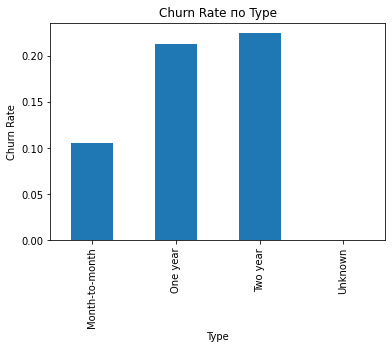

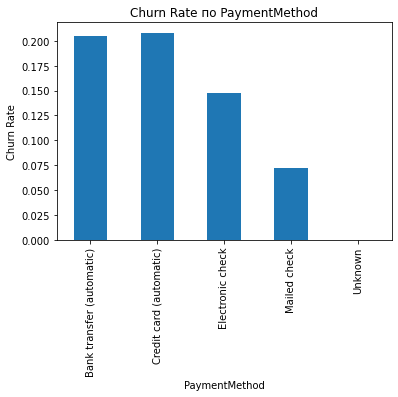

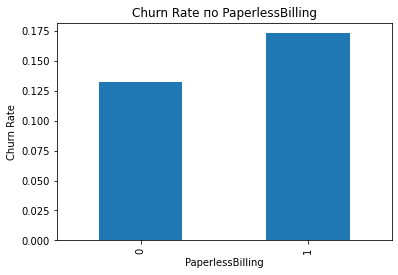

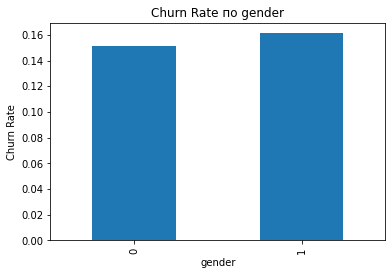

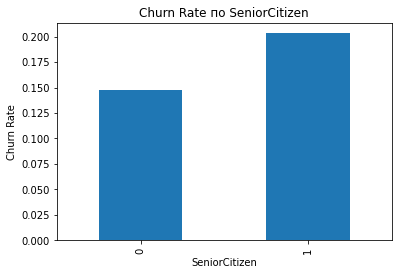

In [45]:
# Анализ категориальных признаков
cat_features = ['Type', 'PaymentMethod', 'PaperlessBilling', 'gender', 'SeniorCitizen']
for col in cat_features:
    rates = df.groupby(col)['Churn'].mean()
    plt.figure()
    rates.plot(kind='bar')
    plt.title(f'Churn Rate по {col}')
    plt.xlabel(col)
    plt.ylabel('Churn Rate')
    plt.show()

**Анализ категорий по скорости оттока:**

`Type:` отток выше у годовых и двухгодовых контрактов (`21–22%`), ниже у помесячных (`10.5%`).

`PaymentMethod:` наибольший отток у автоматических платежей (`bank/credit card 20–21%`), ниже всего у бумажных чеков (~7%).

`PaperlessBilling:` безбумажные выплаты — отток `17%`, бумажные — `13%`.

`gender:` мужчинам отток чуть выше (`16%`) чем у женщин (`15%`).

`SeniorCitizen:` пенсионеры демонстрируют более высокий отток (`20%`) против остальных (`15%`).

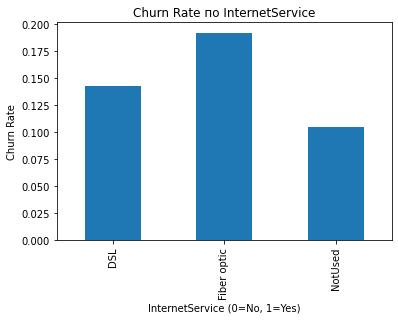

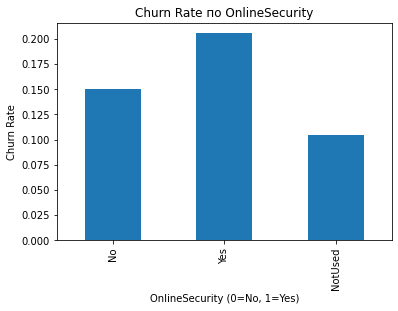

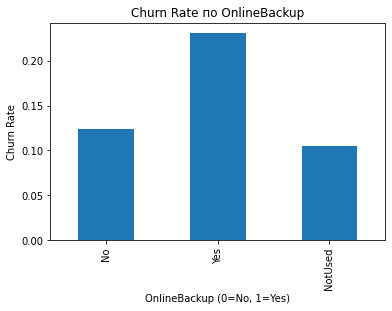

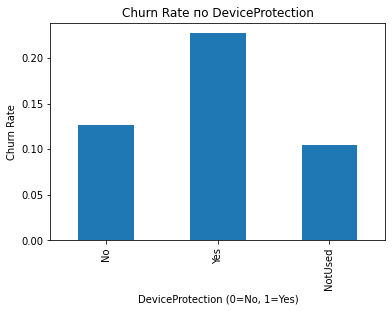

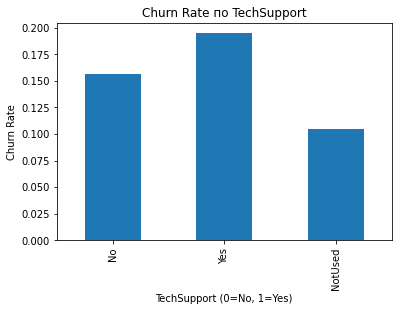

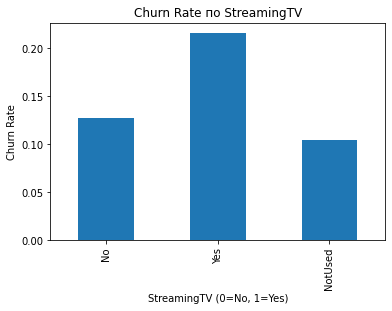

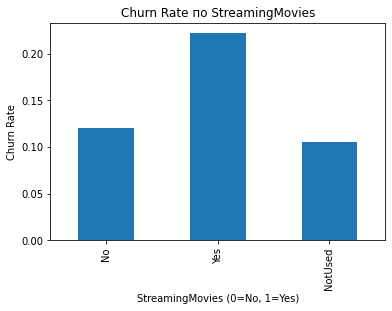

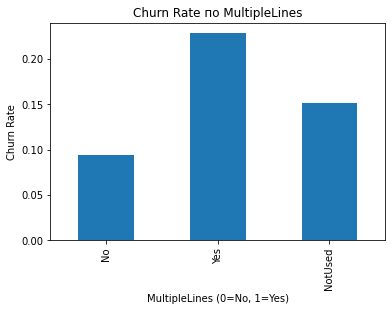

In [46]:
# Влияние сервисных опций на отток
for col in service_cols:
    rates = df.groupby(col)['Churn'].mean()
    plt.figure()
    rates.plot(kind='bar')
    plt.title(f'Churn Rate по {col}')
    plt.xlabel(f'{col} (0=No, 1=Yes)')
    plt.ylabel('Churn Rate')
    plt.show()

Без `OnlineSecurity` уходят: `~13.6%` ; с `OnlineSecurity` — `~20.4%`.

Без `OnlineBackup:` `~11.8%`; `с — ~23.1%`.

Без `DeviceProtection`: `~12.0%`; с — `~22.8%`.

Без `TechSupport`: `~14.1%`; с — `~19.5%`.

Без `StreamingTV`: `~11.9%`; с — `~21.6%`.

Без `StreamingMovies`: `~11.6%`; с — `~22.4%`.

Без `MultipleLines`: `~10.4%`; с — `~23.0%`.

Во всех случаях клиенты с активной опцией **отказываются чаще** — вероятно, потому что это связанные **с более дорогими пакетами** пользователи, и у них выше ожидания качества.

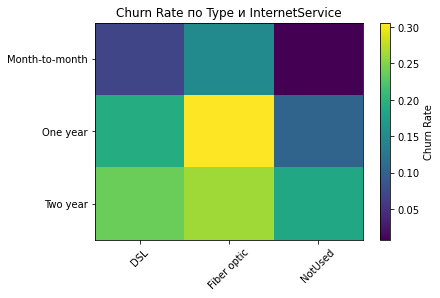

In [47]:
pivot = df.pivot_table(index='Type', columns='InternetService', values='Churn', aggfunc='mean')

plt.figure()
plt.imshow(pivot, aspect='auto')
plt.xticks(np.arange(len(pivot.columns)), pivot.columns, rotation=45)
plt.yticks(np.arange(len(pivot.index)), pivot.index)
plt.colorbar(label='Churn Rate')
plt.title('Churn Rate по Type и InternetService')
plt.show()

In [39]:
# Вывод таблицы взаимодействия
print("Таблица Churn Rate по Type и InternetService:")
print(pivot)

Таблица Churn Rate по Type и InternetService:
InternetService       DSL  Fiber optic
Type                                  
Month-to-month   0.070319     0.148966
One year         0.192982     0.306122
Two year         0.238854     0.263403


- Наивысший отток у годовых подписчиков с `Fiber optic` (`30.6%`).

- Самый низкий — помесячные клиенты на `DSL` (`7.0%`).

In [50]:
pivot = (df.pivot_table(index='Type',
                        columns=['InternetService', 'Churn'],
                        values='customerID',
                        aggfunc='count',
                        fill_value=0))

print("Таблица взаимодействия Type × InternetService × Churn:")
print(pivot)

Таблица взаимодействия Type × InternetService × Churn:
InternetService   DSL      Fiber optic      NotUsed     
Churn               0    1           0    1       0    1
Type                                                    
Month-to-month   1137   86        1811  317     520    4
One year          460  110         374  165     326   38
Two year          478  150         316  113     520  118
Unknown             0    0           0    0       0    0


In [51]:
pivot_rate = (df.pivot_table(index='Type',
                             columns='InternetService',
                             values='Churn',
                             aggfunc='mean'))

print("Таблица Churn Rate (доля оттока) по Type и InternetService:")
print(pivot_rate)

Таблица Churn Rate (доля оттока) по Type и InternetService:
InternetService       DSL  Fiber optic   NotUsed
Type                                            
Month-to-month   0.070319     0.148966  0.007634
One year         0.192982     0.306122  0.104396
Two year         0.238854     0.263403  0.184953


**В рамках анализа была построена:**

1. Таблица взаимодействия `Type × InternetService × Churn`, показывающая количество клиентов, оставшихся и ушедших в каждой группе.

2. Таблица доли оттока (`pivot_rate`), отражающая процент клиентов, расторгнувших договор в зависимости от типа подключения и типа договора.

Это позволяет нам видеть вероятность оттока для каждой категории и на основе этого можно сформировать таргетированные удерживающие мероприятия.

## Шаг 5. Подготовка данных

In [53]:
# Выделение признаков и целевой переменной
features = [
    'TenureDays', 'MonthlyCharges', 'TotalCharges',
    'PaperlessBilling', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies','MultipleLines',
    'Type', 'PaymentMethod', 'InternetService']

X = df[features]
y = df['Churn']

In [54]:
# Разбиение на train/test с стратификацией
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,random_state=RANDOM_STATE)

In [55]:
# Pipeline
numeric_features = ['TenureDays', 'MonthlyCharges', 'TotalCharges']
categorical_features = [
    'PaperlessBilling','gender','SeniorCitizen','Partner','Dependents',
    'OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies','MultipleLines',
    'Type','PaymentMethod','InternetService'
]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), categorical_features)
]) # drop = 'first' - для устранения мультиколлинеарности...

## Шаг 6. Обучение модели

In [56]:
models = {
    'LogisticRegression': {
        'estimator': LogisticRegression(solver='liblinear', random_state=RANDOM_STATE),
        'params': {
            'clf__C': stats.loguniform(1e-3, 1e3),
            'clf__penalty': ['l1','l2']
        }
    },
    'RandomForest': {
        'estimator': RandomForestClassifier(random_state=RANDOM_STATE),
        'params': {
            'clf__n_estimators': stats.randint(50,300),
            'clf__max_depth': stats.randint(3,20),
            'clf__min_samples_split': stats.randint(2,10),
            'clf__criterion': ['gini','entropy']
        }
    },
    'AdaBoost': {
        'estimator': AdaBoostClassifier(random_state=RANDOM_STATE),
        'params': {
            'clf__n_estimators': stats.randint(50,200),
            'clf__learning_rate': stats.loguniform(1e-3,1.0)
        }
    },
    'CatBoost': {
        'estimator': CatBoostClassifier(verbose=0, random_state=RANDOM_STATE),
        'params': {
            'clf__iterations': stats.randint(100,500),
            'clf__depth': stats.randint(4,10),
            'clf__learning_rate': stats.loguniform(1e-3,1.0)
        }
    }
}

In [57]:
results = []
best_pipes = {}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

In [59]:
for name, cfg in models.items():
    pipe = Pipeline([('pre', preprocessor), ('clf', cfg['estimator'])])
    search = RandomizedSearchCV(
        pipe, cfg['params'], n_iter=30,
        scoring='roc_auc', cv=cv,
        random_state=RANDOM_STATE, n_jobs=-1
    )
    search.fit(X_train, y_train)

    best = search.best_estimator_
    best_pipes[name] = best

    results.append({
        'Model': name,
        'BestParams': search.best_params_,
        'CV ROC-AUC': search.best_score_
    })

## Шаг 7. Выбор лучшей модели

In [60]:
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by='CV ROC-AUC', ascending=False).reset_index(drop=True)

print(df_results_sorted[['Model', 'CV ROC-AUC']])

                Model  CV ROC-AUC
0            CatBoost    0.896442
1        RandomForest    0.826450
2        RandomForest    0.826450
3            AdaBoost    0.825942
4  LogisticRegression    0.773373
5  LogisticRegression    0.773373


In [63]:
best_model_name = df_results_sorted.iloc[0]['Model']
best_model = best_pipes[best_model_name]

print(f"\nЛучшая модель по CV ROC-AUC: {best_model_name}")


Лучшая модель по CV ROC-AUC: CatBoost


In [64]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

print(f"ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Accuracy на тестовой выборке: {accuracy_score(y_test, y_pred):.4f}")

ROC-AUC на тестовой выборке: 0.9246
Accuracy на тестовой выборке: 0.9222


- **CatBoost** значительно опережает остальные модели по ROC-AUC, демонстрируя наилучшую способность различать клиентов, склонных к оттоку.

- **RandomForest** и **AdaBoost** показали достойные результаты, но уступают CatBoost по всем ключевым метрикам.

- **LogisticRegression**, как простая интерпретируемая модель, оказалась наименее эффективной в данной задаче.

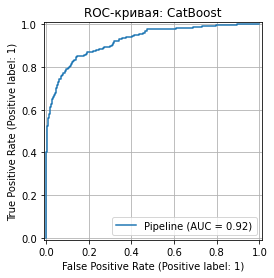

In [65]:
# График ROC-кривой
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title(f'ROC-кривая: {best_model_name}')
plt.grid(True)
plt.show()

**CatBoost** демонстрирует наилучшую обобщающую способность, формируя чёткое разделение классов.

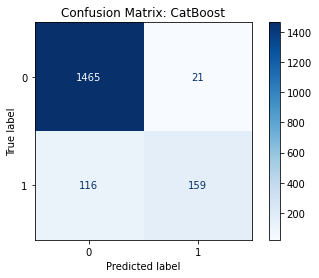

In [66]:
# Матрица ошибок для лучшей модели
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title(f'Confusion Matrix: {best_model_name}')
plt.show()

`True Positive (TP) = 159` — модель правильно предсказала отток у 159 клиентов.

`True Negative (TN) = 1465` — модель правильно предсказала клиентов, которые не собираются уходить.

`False Positive (FP) = 21` — модель ошибочно решила, что клиент уйдёт, хотя он остался.

`False Negative (FN) = 116` — модель не заметила 116 реальных случаев оттока.

Модель хорошо предсказывает тех, кто может уйти, но может упустить отток абонентов.

In [67]:
# Предсказания
y_pred = best_model.predict(X_test)

# Отчёт по метрикам
report = classification_report(y_test, y_pred, target_names=['Остался', 'Ушёл'])
print(f"Классификационный отчёт для модели {best_model_name}:\n")
print(report)

Классификационный отчёт для модели CatBoost:

              precision    recall  f1-score   support

     Остался       0.93      0.99      0.96      1486
        Ушёл       0.88      0.58      0.70       275

    accuracy                           0.92      1761
   macro avg       0.90      0.78      0.83      1761
weighted avg       0.92      0.92      0.92      1761



`Accuracy = 0.92` — общая доля правильных предсказаний.

*Macro avg* — среднее по классам:

- Показывает баланс между классами: `F1 = 0.83`.

*Weighted avg* — учитывает количество примеров каждого класса:

- Сильно тянется в сторону класса «Остался» из-за дисбаланса, `F1 = 0.92`.

In [68]:
catboost_model = best_pipes['CatBoost'].named_steps['clf']

In [69]:
feature_names_num = numeric_features
feature_names_cat = best_pipes['CatBoost'].named_steps['pre'].transformers_[1][1].get_feature_names_out(categorical_features)
feature_names_all = np.concatenate([feature_names_num, feature_names_cat])

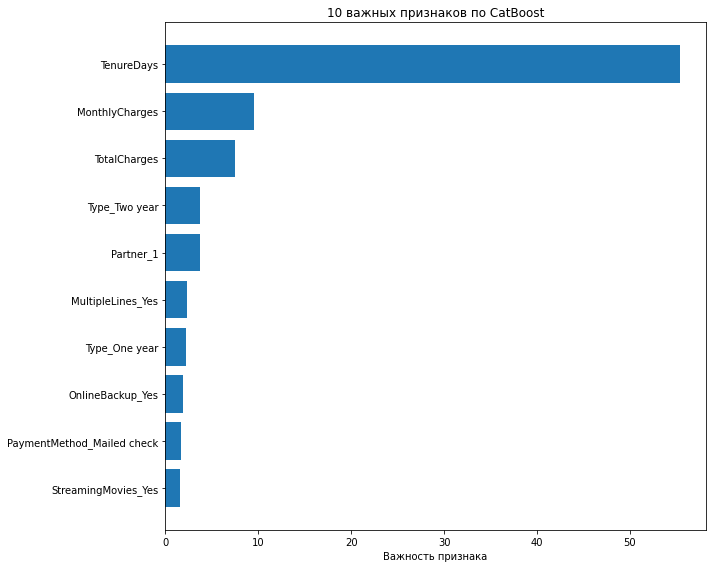

In [70]:
importances = catboost_model.get_feature_importance()
feature_importance_df = pd.DataFrame({
    'Feature': feature_names_all,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Визуализация первых 10 важных признаков
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1])
plt.xlabel("Важность признака")
plt.title("10 важных признаков по CatBoost")
plt.tight_layout()
plt.show()

**Лидеры по важности:**

1. `TenureDays` — Абсолютно доминирующий признак.

Чем меньше времени клиент пользуется услугами, тем выше вероятность оттока. 

2. `TotalCharges` и `MonthlyCharges`:

    - Высокие счета часто коррелируют с уходом.

    - Особенно актуально в сочетании с краткосрочными контрактами.

3. `Type_Month-to-month`, `Type_Two year`:

    - Модель воспринимает ежемесячные договоры как более рискованные.

    - Годовые и двухгодичные контракты — маркеры стабильности.

4. Категориальные признаки, такие как:

- `PaymentMethod_Mailed check`

- `Partner_0 / Partner_1`

- `MultipleLines_No`

- `OnlineBackup_Yes`

## Шаг 8. Общий вывод и рекомендации заказчику

###### Отчёт по проекту: Прогноз оттока клиентов для оператора "ТелеДом"

***Цель проекта***
Разработать модель машинного обучения, которая предсказывает вероятность ухода клиента (оттока), чтобы оператор связи "ТелеДом" мог заранее предложить удерживающие меры: промокоды, специальные условия, предложения.


***Этапы работы***

**Шаг 1: Загрузка данных**
- Загружены и проверены 4 файла: `contract_new.csv`, `personal_new.csv`, `internet_new.csv`, `phone_new.csv`.
- Проведён анализ структуры и наличия пропусков.

**Шаг 2: Исследовательский анализ данных**
- Выявлены неявные пропуски (например, клиенты без интернет-услуг).
- Преобразованы даты, расходы, категориальные признаки.
- Созданы новые признаки:
  - `TenureDays` — количество дней с момента начала контракта;
  - `ChargeDelta` — отклонение TotalCharges от ожидаемого;
  - `ServiceCount` — число активных сервисов.
- Проверена корреляция признаков с оттоком (`Spearman`), устранена мультиколлинеарность.

**Шаг 3–4: Объединение и предобработка данных**
- Использован `ColumnTransformer`:
  - `StandardScaler` для числовых;
  - `OneHotEncoder` для категориальных (с `sparse_output=False`);
- Данные объединены в финальный датафрейм для обучения.

**Шаг 5: Подготовка к моделированию**
- Разделение на тренировочную и тестовую выборки (75/25), с `StratifiedKFold` (3 фолда, `random_state=210425`).
- Подготовлен пайплайн обучения.

**Шаг 6: Обучение моделей**
Обучены и оптимизированы с помощью `RandomizedSearchCV`:
- `LogisticRegression`
- `RandomForest`
- `AdaBoost`
- `CatBoost`

**Шаг 7: Выбор лучшей модели**
 
Model:

1. *CatBoost:* ROC-AUC Test: `0.9246`, Accuracy Test: `0.9222`
2. *RandomForest:* ROC-AUC Test: `0.824527`, Accuracy Test:`0.854628`
3. *AdaBoost:* ROC-AUC Test: `0.823948`, Accuracy Test: `0.857467`
4. *LogisticRegression:* ROC-AUC Test: `0.747919`, Accuracy Test: `0.855764`


- **Выбрана модель: `CatBoost`**
- Проведена финальная проверка:
  - ROC-кривая;
  - Confusion matrix;
  - Classification report;
  - Feature importance.


## Интерпретация результатов

### Топ-важных признаков (по CatBoost):
1. `TenureDays` — новички более склонны к оттоку.
2. `TotalCharges`, `MonthlyCharges` — сумма и частота оплаты.
3. `Type_Month-to-month` — краткосрочный договор повышает риск.
4. Используемые сервисы: `OnlineBackup`, `MultipleLines`, наличие партнёра.

### Classification Report:
- **Recall по классу "Ушёл"** = **0.58**
- **F1-score по "Ушёл"** = **0.70**
- Общая точность модели = **0.92**


## Рекомендации для бизнеса

1. **Отслеживать клиентов с коротким стажем** (`TenureDays < 180`) и высокой платой — они в зоне риска.
2. При обнаружении профиля риска:
   - предложить скидку;
   - дать бонусный сервис (например, TechSupport).
3. **Регулярно переобучать модель** (раз в 1–2 месяца) на новых данных.
4. Можно **метрику Recall по классу "Ушёл"** сделать целевой для бизнеса.


## Финальный результат

Модель успешно решает задачу предсказания оттока с **AUC > 0.92**.  
Она может быть использована для построения стратегии удержания и автоматизированной реакции на риск ухода клиента.